In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='roberta-large'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'rank, alpha':[]}

In [4]:
g = 4
lr = 1.0e-5
wd = 0.0
alphas = [8, 16]
ranks = [8, 16]
lora_dropout = 0.0


for a,r in zip(alphas, ranks):
    print(f'Grid search {model_checkpoint}, learning rate {lr} focal loss, gamma: {g} wd: {wd}, Lora alpha {a}, rank {r}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                            num_labels=data.num_labels,
                            lora=True,
                            r=r,
                            alpha=a,
                            dropout=lora_dropout)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          accumulation_steps=2,
                          focalloss=True,
                          gamma=g,
                          early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['rank, alpha'].append(r)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search roberta-large, learning rate 1e-05 focal loss, gamma: 4 wd: 0.0, Lora alpha 8, rank 8


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.0493	Val Loss:	0.6991	Accuracy:	0.3326	F1:	0.3156
2 / 30: Train Loss:	0.0466	Val Loss:	0.6938	Accuracy:	0.4617	F1:	0.4617
3 / 30: Train Loss:	0.0457	Val Loss:	0.6907	Accuracy:	0.5317	F1:	0.5267
4 / 30: Train Loss:	0.0451	Val Loss:	0.6924	Accuracy:	0.5120	F1:	0.5113
5 / 30: Train Loss:	0.0451	Val Loss:	0.6896	Accuracy:	0.5602	F1:	0.5557
6 / 30: Train Loss:	0.0442	Val Loss:	0.6797	Accuracy:	0.7199	F1:	0.6743
7 / 30: Train Loss:	0.0433	Val Loss:	0.6764	Accuracy:	0.7221	F1:	0.6775
8 / 30: Train Loss:	0.0431	Val Loss:	0.6828	Accuracy:	0.6411	F1:	0.6301
9 / 30: Train Loss:	0.0426	Val Loss:	0.6700	Accuracy:	0.7155	F1:	0.6856
10 / 30: Train Loss:	0.0407	Val Loss:	0.6528	Accuracy:	0.7505	F1:	0.6877
11 / 30: Train Loss:	0.0392	Val Loss:	0.6449	Accuracy:	0.7702	F1:	0.7102
12 / 30: Train Loss:	0.0396	Val Loss:	0.6319	Accuracy:	0.7571	F1:	0.6803
13 / 30: Train Loss:	0.0400	Val Loss:	0.6393	Accuracy:	0.7724	F1:	0.7278
14 / 30: Train Loss:	0.0384	Val Loss:	0.6307	Accuracy:	0.770

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.0493	Val Loss:	0.6990	Accuracy:	0.3370	F1:	0.3201
2 / 30: Train Loss:	0.0466	Val Loss:	0.6934	Accuracy:	0.4617	F1:	0.4617
3 / 30: Train Loss:	0.0456	Val Loss:	0.6907	Accuracy:	0.5339	F1:	0.5299
4 / 30: Train Loss:	0.0449	Val Loss:	0.6923	Accuracy:	0.5120	F1:	0.5113
5 / 30: Train Loss:	0.0449	Val Loss:	0.6880	Accuracy:	0.5930	F1:	0.5856
6 / 30: Train Loss:	0.0437	Val Loss:	0.6750	Accuracy:	0.7396	F1:	0.6838
7 / 30: Train Loss:	0.0425	Val Loss:	0.6676	Accuracy:	0.7440	F1:	0.6891
8 / 30: Train Loss:	0.0419	Val Loss:	0.6683	Accuracy:	0.7199	F1:	0.6914
9 / 30: Train Loss:	0.0408	Val Loss:	0.6516	Accuracy:	0.7374	F1:	0.7023
10 / 30: Train Loss:	0.0391	Val Loss:	0.6286	Accuracy:	0.7637	F1:	0.6996
11 / 30: Train Loss:	0.0374	Val Loss:	0.6217	Accuracy:	0.7790	F1:	0.7253
12 / 30: Train Loss:	0.0381	Val Loss:	0.6123	Accuracy:	0.7877	F1:	0.7252
13 / 30: Train Loss:	0.0383	Val Loss:	0.6197	Accuracy:	0.7812	F1:	0.7383
14 / 30: Train Loss:	0.0366	Val Loss:	0.6094	Accuracy:	0.792

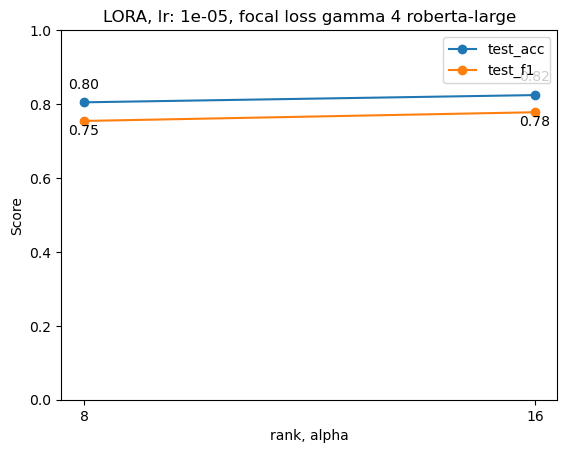

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'LORA, lr: {lr}, focal loss gamma {g} {model_checkpoint}',
                        column='rank, alpha',
                        sci_format=False)

In [6]:
%reset -f